In [2]:
!pip install keras

In [3]:
!pip install scikit-learn

In [4]:
!pip install matplotlib

In [12]:
stocks_data = pd.read_csv("/content/NFLX Historical Data.csv")
stocks_data.columns
# stocks_data = stocks_data['Close']
# scaler = MinMaxScaler()

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [13]:
stocks_data = stocks_data['Open']
stocks_data

0         1.21
1         1.21
2         1.16
3         1.11
4         1.08
         ...  
5270    329.43
5271    325.00
5272    317.55
5273    319.01
5274    323.78
Name: Open, Length: 5275, dtype: float64

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
Epoch 39, D Loss Real: 0.33530229330062866, D Loss Fake: 0.3425484299659729, G Loss: 1.3641754388809204
2/2 [==============================] - 0s 5ms/step
Epoch 40, D Loss Real: 0.6057329773902893, D Loss Fake: 0.44717878103256226, G Loss: 1.3096630573272705
2/2 [==============================] - 0s 7ms/step
Epoch 41, D Loss Real: 0.48464223742485046, D Loss Fake: 0.334927499294281, G Loss: 1.433220386505127
2/2 [==============================] - 0s 6ms/step
Epoch 42, D Loss Real: 0.5080705881118774, D Loss Fake: 0.3141123056411743, G Loss: 1.3799173831939697
2/2 [==============================] - 0s 5ms/step
Epoch 43, D Loss Real: 0.4685923755168915, D Loss Fake: 0.3596532344818115, G Loss: 1.6230413913726807
2/2 [==============================] - 0s 6ms/step
Epoch 44, D Loss Real: 0.4800336956977844, D Loss Fake: 0.44929778575897217, G Loss: 1.6449787616729736
2/2 [==================

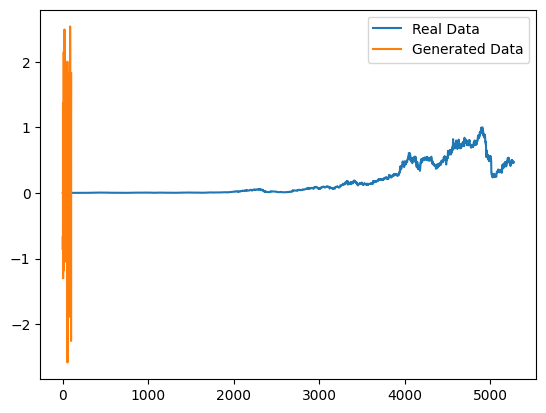

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Generate synthetic stock price data (you can replace this with your own dataset)

stocks_data = pd.read_csv("/content/NFLX Historical Data.csv")
stocks_data = stocks_data['Open']

# Normalize the data
scaler = MinMaxScaler()
data = stocks_data.values.reshape(-1, 1)
data = scaler.fit_transform(data)

# Build the generator model
def build_generator(latent_dim, output_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(output_shape, activation='tanh'))
    return model

# Build the discriminator model
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(256, input_dim=input_shape))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Build the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Train the GAN
def train_gan(generator, discriminator, gan, data, latent_dim, epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(data.shape[0] // batch_size):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)
            real_data = data[np.random.randint(0, data.shape[0], batch_size)]
            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_data, labels_real)
            d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            labels_gan = np.ones((batch_size, 1))

            g_loss = gan.train_on_batch(noise, labels_gan)

        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")

# Generate synthetic data
# data = generate_data(1000)
# print(data)

# data = normalize_data(data)

# Set hyperparameters
latent_dim = 100
epochs = 100
batch_size = 64

# Build and compile models
generator = build_generator(latent_dim, data.shape[1])
discriminator = build_discriminator(data.shape[1])
gan = build_gan(generator, discriminator)

# Train the GAN
train_gan(generator, discriminator, gan, data, latent_dim, epochs, batch_size)

# Generate synthetic stock prices
noise = np.random.normal(0, 1, (100, latent_dim))
generated_data = generator.predict(noise)
generated_data = generated_data.reshape(-1, 1)

# Inverse transform the generated data to the original scale
generated_data = StandardScaler().fit_transform(generated_data)
# scalar.inverse_transform(generated_data)

# Plot the results
plt.plot(data, label='Real Data')
plt.plot(generated_data, label='Generated Data')
plt.legend()
plt.show()